<a href="https://colab.research.google.com/github/baijuthomas528/B_Python/blob/main/Trading_Futures_Options.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                                                
                                                                **Price Trends**

In [1]:
import yfinance as yf
import pandas as pd

def plot_stock_returns(tickers, start_date, end_date):
    # Create a dictionary to hold the results for each ticker
    results_dict = {}

    for ticker in tickers:
        # Download stock data for the specified ticker and date range
        stock_data = yf.download(ticker, start=start_date, end=end_date)

        # Get the current price of the ticker
        current_price = stock_data['Adj Close'][-1]

        # Calculate daily returns
        stock_data['Daily Return'] = stock_data['Adj Close'].pct_change()

        # Resample to weekly data and calculate weekly returns
        stock_data['Weekly Return'] = stock_data['Adj Close'].resample('W-FRI').ffill().pct_change()

        # Resample to monthly data and calculate monthly returns
        stock_data['Monthly Return'] = stock_data['Adj Close'].resample('M').ffill().pct_change()

        # Calculate the required statistics for daily returns
        max_daily_return = stock_data['Daily Return'].max()
        min_daily_return = stock_data['Daily Return'].min()
        median_daily_return = stock_data['Daily Return'].median()
        avg_daily_return = stock_data['Daily Return'].mean()

        # Find the dates for the max and min daily returns
        max_daily_return_date = stock_data['Daily Return'].idxmax()
        min_daily_return_date = stock_data['Daily Return'].idxmin()

        # Calculate the required statistics for weekly returns
        weekly_data = stock_data['Weekly Return'].dropna()  # Drop NaN values before calculating stats
        max_weekly_return = weekly_data.max()
        min_weekly_return = weekly_data.min()
        median_weekly_return = weekly_data.median()
        avg_weekly_return = weekly_data.mean()

        # Find the dates for the max and min weekly returns
        max_weekly_return_date = weekly_data.idxmax()
        min_weekly_return_date = weekly_data.idxmin()

        # Calculate the price after applying the min weekly return
        price_below_min_weekly = current_price * (1 + min_weekly_return)
        # Calculate the price after applying the max weekly return
        price_above_max_weekly = current_price * (1 + max_weekly_return)

        # Calculate the required statistics for monthly returns
        monthly_data = stock_data['Monthly Return'].dropna()  # Drop NaN values before calculating stats
        max_monthly_return = monthly_data.max()
        min_monthly_return = monthly_data.min()
        median_monthly_return = monthly_data.median()
        avg_monthly_return = monthly_data.mean()

        # Find the dates for the max and min monthly returns
        max_monthly_return_date = monthly_data.idxmax()
        min_monthly_return_date = monthly_data.idxmin()

        # Calculate the price after applying the min monthly return
        price_below_min_monthly = current_price * (1 + min_monthly_return)
        # Calculate the price after applying the max monthly return
        price_above_max_monthly = current_price * (1 + max_monthly_return)

        # Count the number of times daily, weekly, and monthly returns were close to 3%, 5%, and 10%
        daily_3_percent_count = stock_data['Daily Return'].abs().ge(0.03).sum()
        daily_5_percent_count = stock_data['Daily Return'].abs().ge(0.05).sum()
        daily_10_percent_count = stock_data['Daily Return'].abs().ge(0.10).sum()
        weekly_3_percent_count = weekly_data.abs().ge(0.03).sum()
        weekly_4_percent_count = weekly_data.abs().ge(0.04).sum()
        weekly_5_percent_count = weekly_data.abs().ge(0.05).sum()
        weekly_10_percent_count = weekly_data.abs().ge(0.10).sum()
        monthly_3_percent_count = monthly_data.abs().ge(0.03).sum()
        monthly_5_percent_count = monthly_data.abs().ge(0.05).sum()
        monthly_10_percent_count = monthly_data.abs().ge(0.10).sum()
        monthly_4_percent_count = monthly_data.abs().ge(0.04).sum()

        # Store the results in the dictionary
        results_dict[ticker] = {
            "Current Price": f"{current_price:.2f}",
            "Max Daily Return": f"{max_daily_return:.5%}",
            "Max Daily Return Date": max_daily_return_date,
            "Min Daily Return": f"{min_daily_return:.5%}",
            "Min Daily Return Date": min_daily_return_date,
            "Median Daily Return": f"{median_daily_return:.5%}",
            "Average Daily Return": f"{avg_daily_return:.5%}",
            "Max Weekly Return": f"{max_weekly_return:.5%}",
            "Max Weekly Return Date": max_weekly_return_date,
            "Min Weekly Return": f"{min_weekly_return:.5%}",
            "Min Weekly Return Date": min_weekly_return_date,
            "Price Above Max Weekly": f"{price_above_max_weekly:.2f}",
            "Price Below Min Weekly": f"{price_below_min_weekly:.2f}",
            "Median Weekly Return": f"{median_weekly_return:.5%}",
            "Average Weekly Return": f"{avg_weekly_return:.5%}",
            "Max Monthly Return": f"{max_monthly_return:.5%}",
            "Max Monthly Return Date": max_monthly_return_date,
            "Min Monthly Return": f"{min_monthly_return:.5%}",
            "Min Monthly Return Date": min_monthly_return_date,
            "Price Above Max Monthly": f"{price_above_max_monthly:.2f}",
            "Price Below Min Monthly": f"{price_below_min_monthly:.2f}",
            "Median Monthly Return": f"{median_monthly_return:.5%}",
            "Average Monthly Return": f"{avg_monthly_return:.5%}",
            "Times Daily Return Tested 3%": daily_3_percent_count,
            "Times Daily Return Tested 5%": daily_5_percent_count,
            "Times Daily Return Tested 10%": daily_10_percent_count,
            "Times Weekly Return Tested 3%": weekly_3_percent_count,
            "Times Weekly Return Tested 4%": weekly_4_percent_count,
            "Times Weekly Return Tested 5%": weekly_5_percent_count,
            "Times Weekly Return Tested 10%": weekly_10_percent_count,
            "Times Monthly Return Tested 3%": monthly_3_percent_count,
            "Times Monthly Return Tested 4%": monthly_4_percent_count,
            "Times Monthly Return Tested 5%": monthly_5_percent_count,
            "Times Monthly Return Tested 10%": monthly_10_percent_count
        }

    # Convert the results dictionary to a DataFrame for better readability
    results_df = pd.DataFrame(results_dict)

    # Display the results with tickers as headers
    print(results_df)

# Example usage:
tickers = ["GC=F", "^NSEI", "^SPX", "NFTY"]  # List of tickers you want to analyze
start_date = "2024-01-01"  # Start date
end_date = "2024-12-28"  # End date

plot_stock_returns(tickers, start_date, end_date)


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-d6bc37acb684>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_price = stock_data['Adj Close'][-1]
<ipython-input-1-d6bc37acb684>:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  stock_data['Monthly Return'] = stock_data['Adj Close'].resample('M').ffill().pct_change()
[*********************100%***********************]  1 of 1 completed
<ipython-input-1-d6bc37acb684>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_price = stock_data['Adj Close'][-1]
<ipython-i

                                                GC=F                ^NSEI  \
Current Price                                2725.40             24694.90   
Max Daily Return                            2.01398%             3.36242%   
Max Daily Return Date            2024-03-01 00:00:00  2024-06-05 00:00:00   
Min Daily Return                           -2.76017%            -5.92936%   
Min Daily Return Date            2024-04-22 00:00:00  2024-06-04 00:00:00   
Median Daily Return                         0.19308%             0.10722%   
Average Daily Return                        0.14228%             0.06907%   
Max Weekly Return                           4.88410%             3.37074%   
Max Weekly Return Date           2024-04-05 00:00:00  2024-06-07 00:00:00   
Min Weekly Return                          -3.30404%            -4.44766%   
Min Weekly Return Date           2024-05-24 00:00:00  2024-10-04 00:00:00   
Price Above Max Weekly                       2858.51             25527.30   


<ipython-input-1-d6bc37acb684>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_price = stock_data['Adj Close'][-1]
<ipython-input-1-d6bc37acb684>:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  stock_data['Monthly Return'] = stock_data['Adj Close'].resample('M').ffill().pct_change()


**Black Scholes calculator**

In [ ]:
#Black Scholes calculator

import numpy as np
from scipy.stats import norm

# Parameters
S = 471.44  # Spot price
K = 450     # Strike price
T = 36 / 365  # Time to expiration in years
r = 0.02     # Risk-free interest rate
sigma = 0.2294 # Volatility

# Black-Scholes Put Price Calculation
d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)
put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)



# Greeks Calculation

# Delta
delta = -norm.cdf(-d1)

# Gamma
gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))

# Vega
vega = S * norm.pdf(d1) * np.sqrt(T) / 100  # Vega is typically given in percentage terms

# Theta
theta = (-S * norm.pdf(d1) * sigma / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm.cdf(-d2)) / 365  # Theta per day

# Rho
rho = -K * T * np.exp(-r * T) * norm.cdf(-d2) / 100  # Rho is typically given in percentage terms

# Output
print(f"Put Price: {put_price:.2f}")
print(f"Delta: {delta:.4f}")
print(f"Gamma: {gamma:.4f}")
print(f"Vega: {vega:.4f}")
print(f"Theta: {theta:.4f}")
print(f"Rho: {rho:.4f}")


Put Price: 4.95
Delta: -0.2390
Gamma: 0.0091
Vega: 0.4592
Theta: -0.1528
Rho: -0.1160


In [ ]:
# bachelier_pricing

import numpy as np
from scipy.stats import norm

def bachelier_call_price(S, K, T, r, sigma):
    d1 = (S - K) / (sigma * np.sqrt(T))
    call_price = (S - K) * norm.cdf(d1) + sigma * np.sqrt(T) * norm.pdf(d1)
    return call_price

def bachelier_put_price(S, K, T, r, sigma):
    d1 = (S - K) / (sigma * np.sqrt(T))
    put_price = (K - S) * norm.cdf(-d1) + sigma * np.sqrt(T) * norm.pdf(d1)
    return put_price

# Example parameters
S = 90    # Spot price (can be negative in Bachelier model)
K = 75     # Strike price
T = 4 / 365  # Time to expiration in years
r = 0.02     # Risk-free interest rate (not used directly in Bachelier model)
sigma = 0.11  # Volatility (standard deviation)

# Call and Put Prices
call_price = bachelier_call_price(S, K, T, r, sigma)
put_price = bachelier_put_price(S, K, T, r, sigma)

call_price, put_price


(15.0, 0.0)

Heston Model that uses stochasti volatility to price Vs  Black-Scholes, where volatility is assumed to be constant.

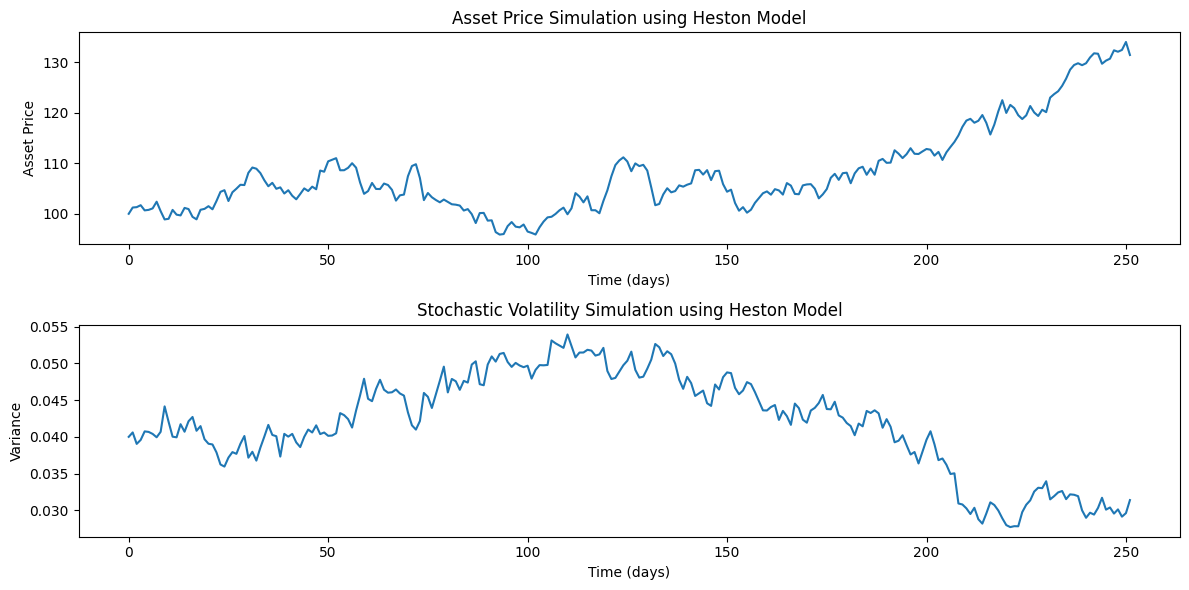

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Heston model parameters
mu = 0.1             # drift of the asset price
theta = 0.04         # long-term variance
sigma = 0.5          # speed of mean reversion
xi = 0.1             # volatility of volatility
S0 = 100             # initial asset price
V0 = 0.04            # initial variance
T = 1                # time horizon
dt = 1/252           # daily time step
N = int(T / dt)     # number of time steps

# Initialize arrays
S = np.zeros(N)
V = np.zeros(N)
S[0] = S0
V[0] = V0

# Correlation between the two Brownian motions
rho = -0.5  # correlation
Z1 = np.random.normal(size=N)  # for asset price
Z2 = np.random.normal(size=N)  # for volatility

# Simulate the process
for t in range(1, N):
    # Generate correlated Brownian motions
    Z2[t] = rho * Z1[t] + np.sqrt(1 - rho**2) * Z2[t]

    # Update variance using the Heston model equation
    V[t] = np.maximum(V[t-1] + theta * (V[t-1] - V0) * dt + xi * np.sqrt(V[t-1]) * np.sqrt(dt) * Z2[t], 0)

    # Update asset price using the asset price dynamics
    S[t] = S[t-1] * np.exp((mu - 0.5 * V[t-1]) * dt + np.sqrt(V[t-1]) * np.sqrt(dt) * Z1[t])

# Plotting the results
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(S)
plt.title('Asset Price Simulation using Heston Model')
plt.xlabel('Time (days)')
plt.ylabel('Asset Price')

plt.subplot(2, 1, 2)
plt.plot(V)
plt.title('Stochastic Volatility Simulation using Heston Model')
plt.xlabel('Time (days)')
plt.ylabel('Variance')

plt.tight_layout()
plt.show()


**Seasonality per Ticker**

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf

def seasonality_grid(ticker, start_date, end_date):
    # Download historical data for the given ticker
    data = yf.download(ticker, start=start_date, end=end_date)

    # Calculate monthly returns
    data['Monthly Return'] = data['Adj Close'].resample('M').ffill().pct_change() * 100

    # Identify the last valid index before applying backward fill
    last_valid_idx = data['Monthly Return'].last_valid_index()

    # Apply backward fill only up to the last valid date
    data.loc[:last_valid_idx, 'Monthly Return'] = data.loc[:last_valid_idx, 'Monthly Return'].fillna(method='bfill')

    # Group data by year and month
    data['Year'] = data.index.year
    data['Month'] = data.index.strftime('%b')

    # Pivot the data to create a grid with years as rows and months as columns
    df = data.pivot_table(index='Year', columns='Month', values='Monthly Return', aggfunc='mean')

    # Reorder the columns to follow the calendar months
    months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    df = df[months_order]

    # Add Average, Median, High, and Low
    df.loc['Average'] = df.mean()
    df.loc['Median'] = df.median()
    df.loc['High'] = df.max()
    df.loc['Low'] = df.min()

    # Display the DataFrame
    print(df)

# Example usage:
ticker = '^SPX'
start_date = '2014-01-01'
end_date = '2024-12-31'

seasonality_grid(ticker, start_date, end_date)


[*********************100%***********************]  1 of 1 completed

Month         Jan        Feb        Mar        Apr       May       Jun  \
Year                                                                     
2014     4.311703   4.311703   0.693217   0.620079  1.905833  1.905833   
2015    -1.739611  -1.739611  -1.739611   0.852082 -2.101167 -2.101167   
2016    -0.412836  -0.412836   6.599111   1.532460  1.532460  0.091092   
2017     1.788436   3.719816  -0.038920   1.157625  1.157625  0.481378   
2018     5.617870  -3.894737   0.271877   0.271877  2.160834  3.602156   
2019     7.868440   2.972889   3.931350   3.931350 -6.577773  1.312815   
2020    -0.162809 -12.511928 -12.511928  12.684404  1.838840  1.838840   
2021     4.243863   4.243863   4.243863   5.242532  2.221401  2.221401   
2022    -5.258517  -3.136049   3.577329   0.005318  0.005318 -8.392000   
2023     6.175286  -2.611249   3.505161   0.248235  0.248235  6.472746   
2024     1.589571   5.172064  -4.161507  -4.161507  4.802119  1.132132   
Average  2.183763  -0.353280   0.39726


<ipython-input-10-b07a9754d8eb>:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.loc[:last_valid_idx, 'Monthly Return'] = data.loc[:last_valid_idx, 'Monthly Return'].fillna(method='bfill')


https://quant-next.com/option-greeks-and-pl-decomposition-part-1/  - Pnl Explain


In [ ]:
# Define function to calculate P&L components
def calculate_pnl(delta, gamma, theta, vega, volga, vanna, cross_gamma, spot_price_day1, spot_price_day2, dsigma, dt, relative_difference=False):
    # Calculate dS based on the relative or absolute difference
    if relative_difference:
        dS = (spot_price_day1 / spot_price_day2) - 1  # Relative difference (percentage change)
        # For FX
        ##dS = (spot_price_day2 / spot_price_day1) - 1  # Relative difference (percentage change)
    else:
        dS = spot_price_day1 - spot_price_day2  # Absolute difference

    # Calculate each P&L component
    delta_pnl = delta * dS
    gamma_pnl = 0.5 * gamma * (dS ** 2)
    theta_pnl = theta * dt
    vega_pnl = vega * dsigma
    volga_pnl = 0.5 * volga * (dsigma ** 2)
    vanna_pnl = vanna * dS * dsigma

    # Cross Gamma P&L: accounts for interaction between spot price and volatility changes
    cross_gamma_pnl = cross_gamma * dS * dsigma

    # Output each P&L component
    print(f"Delta P&L: {delta_pnl:.2f}")
    print(f"Gamma P&L: {gamma_pnl:.2f}")
    print(f"Theta P&L: {theta_pnl:.2f}")
    print(f"Vega P&L: {vega_pnl:.2f}")
    print(f"Volga P&L: {volga_pnl:.2f}")
    print(f"Vanna P&L: {vanna_pnl:.2f}")
    print(f"Cross Gamma P&L: {cross_gamma_pnl:.2f}")

    # Calculate and return total P&L
    total_pnl = delta_pnl + gamma_pnl + theta_pnl + vega_pnl + volga_pnl + vanna_pnl + cross_gamma_pnl
    print(f"Total P&L: {total_pnl:.2f}")
    return total_pnl

# Example input parameters
delta_input = 7.26
gamma_input = -0.29
theta_input = 2.593
vega_input = -11.88
volga_input = 0  # Example input for volga
vanna_input = 0  # Example input for vanna
cross_gamma_input = 0  # Example input for cross-gamma
spot_price_day1 = 475.34
spot_price_day2 = 470.66
dsigma_input = 0  # Solution needs - Vega Current MD - Vega Previous MD)
dt_input = 1 / 365  # Input change in time (1 day)

# Call the function with absolute difference
print("Using Absolute Difference:")
calculate_pnl(delta_input, gamma_input, theta_input, vega_input, volga_input, vanna_input, cross_gamma_input, spot_price_day1, spot_price_day2, dsigma_input, dt_input, relative_difference=False)

# Call the function with relative difference
print("\nUsing Relative Difference:")
calculate_pnl(delta_input, gamma_input, theta_input, vega_input, volga_input, vanna_input, cross_gamma_input, spot_price_day1, spot_price_day2, dsigma_input, dt_input, relative_difference=True)

# Output statements
print("\nAsset Class Delta Explanation:")
print("1) Interest Rate (IR) Delta: Uses absolute basis point change.")
print("2) Credit/Repo Delta: Uses absolute basis point change.")
print("3) Foreign Exchange (FX) Delta: Uses relative shift in FX rate. (Also, change the formula above)")
print("4) Equity Delta: Uses relative price change.")
print("5) Commodity Delta: Uses relative price change.")
print("6) Vega and Volga is always Absolute change for all asset class.")
print("7) Theta change - TBD.")
print("8) Vanna in Solution the dsigma = (Vanna Previous MD - Vanna Current MD   # always Absolute Difference)")
print("8) Vanna's dS in solution is called (Vanna Previous MD2- Vanna Current MD2) it has the same values as the underlying's settlement price dS and the logic of the Diff values will follow the same as the above asset class rules of Relative vs Absolute  # in solution also drag and drop Risk Factor secondary)")
print("8) Vanna MDX saved in training file)")
print("9) Cross_gamma- TBD)")
print("10) MR solution asks for the shifts and not the prices so the above market data related to dS and dsigma is supplied as Shifts from the client and client can decide relative Vs Absolute)")


Using Absolute Difference:
Delta P&L: 33.98
Gamma P&L: -3.18
Theta P&L: 0.01
Vega P&L: -0.00
Volga P&L: 0.00
Vanna P&L: 0.00
Cross Gamma P&L: 0.00
Total P&L: 30.81

Using Relative Difference:
Delta P&L: 0.07
Gamma P&L: -0.00
Theta P&L: 0.01
Vega P&L: -0.00
Volga P&L: 0.00
Vanna P&L: 0.00
Cross Gamma P&L: 0.00
Total P&L: 0.08

Asset Class Delta Explanation:
1) Interest Rate (IR) Delta: Uses absolute basis point change.
2) Credit/Repo Delta: Uses absolute basis point change.
3) Foreign Exchange (FX) Delta: Uses relative shift in FX rate. (Also, change the formula above)
4) Equity Delta: Uses relative price change.
5) Commodity Delta: Uses relative price change.
6) Vega and Volga is always Absolute change for all asset class.
7) Theta change - TBD.
8) Vanna in Solution the dsigma = (Vanna Previous MD - Vanna Current MD   # always Absolute Difference)
8) Vanna's dS in solution is called (Vanna Previous MD2- Vanna Current MD2) it has the same values as the underlying's settlement price dS a

In [ ]:
import numpy as np
from scipy.stats import norm
import pandas as pd

def black_scholes_put(S, K, T, r, sigma, multiplier):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return put_price * multiplier

def calculate_pnl(S, strike_long, strike_short, premium_long, premium_short, T, r, sigma, multiplier, lots):
    # Define the percentage moves you want to analyze
    percentages = [-0.10, -0.05, -0.04, -0.03, -0.02, -0.01, 0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.10]
    S_values = [S * (1 + pct) for pct in percentages]

    # Calculate the initial credit received
    initial_credit = (premium_short - premium_long) * multiplier * lots

    # Calculate max loss
    strike_width = strike_short - strike_long
    max_loss = (strike_width * multiplier * lots) - initial_credit

    # Calculate PnL and store premiums for each scenario
    pnls = []
    premiums_long = []
    premiums_short = []

    for S_new in S_values:
        # Calculate new premiums using Black-Scholes
        new_premium_long = black_scholes_put(S_new, strike_long, T, r, sigma, multiplier)
        new_premium_short = black_scholes_put(S_new, strike_short, T, r, sigma, multiplier)

        # Calculate spread value
        spread_value = (new_premium_short - new_premium_long) * lots

        # Calculate PnL (starting with the initial credit received)
        pnl = initial_credit - spread_value

        # Cap the loss at the max loss
        pnl = max(-max_loss, pnl)

        # Append values for display
        pnls.append(pnl)
        premiums_long.append(new_premium_long)
        premiums_short.append(new_premium_short)

    return pnls, premiums_long, premiums_short, S_values

# Template for Input Parameters (You can change these)
S = 5618.26  # Spot price
strike_long = 5395  # Long option strike (bought)
strike_short = 5400  # Short option strike (sold)
premium_long = -.4137  # Premium for long option
premium_short = +.4202  # Premium for short option
T = 42 / 365  # Time to expiration in years
r = 0.02  # Risk-free rate
sigma = 0.18  # Volatility
multiplier = 100  # Contract multiplier (change if needed)
lots = 4  # Number of lots

# Calculate PnL and premiums
pnls, premiums_long, premiums_short, S_values = calculate_pnl(S, strike_long, strike_short, premium_long, premium_short, T, r, sigma, multiplier, lots)

# Create a DataFrame for display
df_pnl = pd.DataFrame({
    "Strikes": [f"{strike_long}/{strike_short}"],
    "-10%": [pnls[0]],
    "-5%": [pnls[1]],
    "-4%": [pnls[2]],
    "-3%": [pnls[3]],
    "-2%": [pnls[4]],
    "-1%": [pnls[5]],
    "0%": [pnls[6]],
    "+1%": [pnls[7]],
    "+2%": [pnls[8]],
    "+3%": [pnls[9]],
    "+4%": [pnls[10]],
    "+5%": [pnls[11]],
    "+10%": [pnls[12]]
})

# Format the PnL columns to show dollar amounts
for col in df_pnl.columns[1:]:
    df_pnl[col] = df_pnl[col].apply(lambda x: f"${x:.2f}")

# Create a DataFrame for premiums and new spot prices
df_premiums = pd.DataFrame({
    "Strikes": [f"{strike_long}/{strike_short}"],
    "-10% Spot": [f"{S_values[0]:.2f}"], "-10% Long": [f"${premiums_long[0]:.2f}"], "-10% Short": [f"${premiums_short[0]:.2f}"],
    "-5% Spot": [f"{S_values[1]:.2f}"], "-5% Long": [f"${premiums_long[1]:.2f}"], "-5% Short": [f"${premiums_short[1]:.2f}"],
    "-4% Spot": [f"{S_values[2]:.2f}"], "-4% Long": [f"${premiums_long[2]:.2f}"], "-4% Short": [f"${premiums_short[2]:.2f}"],
    "-3% Spot": [f"{S_values[3]:.2f}"], "-3% Long": [f"${premiums_long[3]:.2f}"], "-3% Short": [f"${premiums_short[3]:.2f}"],
    "-2% Spot": [f"{S_values[4]:.2f}"], "-2% Long": [f"${premiums_long[4]:.2f}"], "-2% Short": [f"${premiums_short[4]:.2f}"],
    "-1% Spot": [f"{S_values[5]:.2f}"], "-1% Long": [f"${premiums_long[5]:.2f}"], "-1% Short": [f"${premiums_short[5]:.2f}"],
    "0% Spot": [f"{S_values[6]:.2f}"], "0% Long": [f"${premiums_long[6]:.2f}"], "0% Short": [f"${premiums_short[6]:.2f}"],
    "+1% Spot": [f"{S_values[7]:.2f}"], "+1% Long": [f"${premiums_long[7]:.2f}"], "+1% Short": [f"${premiums_short[7]:.2f}"],
    "+2% Spot": [f"{S_values[8]:.2f}"], "+2% Long": [f"${premiums_long[8]:.2f}"], "+2% Short": [f"${premiums_short[8]:.2f}"],
    "+3% Spot": [f"{S_values[9]:.2f}"], "+3% Long": [f"${premiums_long[9]:.2f}"], "+3% Short": [f"${premiums_short[9]:.2f}"],
    "+4% Spot": [f"{S_values[10]:.2f}"], "+4% Long": [f"${premiums_long[10]:.2f}"], "+4% Short": [f"${premiums_short[10]:.2f}"],
    "+5% Spot": [f"{S_values[11]:.2f}"], "+5% Long": [f"${premiums_long[11]:.2f}"], "+5% Short": [f"${premiums_short[11]:.2f}"],
    "+10% Spot": [f"{S_values[12]:.2f}"], "+10% Long": [f"${premiums_long[12]:.2f}"], "+10% Short": [f"${premiums_short[12]:.2f}"]
})

# Display the results
print("PnL Results:")
print(df_pnl)
print("\nPremiums and Spot Prices at Different Market Moves:")
print(df_premiums)


PnL Results:
     Strikes       -10%       -5%       -4%       -3%       -2%       -1%  \
0  5395/5400  $-1374.21  $-803.83  $-668.03  $-533.52  $-404.03  $-282.75   

         0%      +1%     +2%     +3%      +4%      +5%     +10%  
0  $-172.18  $-73.95  $11.14  $83.07  $142.45  $190.35  $307.51  

Premiums and Spot Prices at Different Market Moves:
     Strikes -10% Spot  -10% Long -10% Short -5% Spot   -5% Long  -5% Short  \
0  5395/5400   5056.43  $35151.74  $35578.68  5337.35  $15441.49  $15725.83   

  -4% Spot   -4% Long  -4% Short  ... +3% Short +4% Spot  +4% Long +4% Short  \
0  5393.53  $12583.47  $12833.87  ...  $2029.81  5842.99  $1417.85  $1465.63   

  +5% Spot  +5% Long +5% Short +10% Spot +10% Long +10% Short  
0  5899.17  $1006.04  $1041.85   6180.09   $143.68    $150.19  

[1 rows x 40 columns]


https://github.com/quant-science/vectorbt_backtesting/blob/master/01_ma_crossover.py?ck_subscriber_id=2765607720

Back Testing link


In [ ]:
import yfinance as yf
import vectorbt as vbt
import pandas as pd
import numpy as np
import os

# Download data from Yahoo Finance
price_aapl = yf.download('NVDA', start='2023-01-01', end='2024-08-01')['Close']

# Optionally create the 'data' directory and save the data
if not os.path.exists('data'):
    os.makedirs('data')

price_aapl.to_pickle('data/price_aapl.pkl')

print(price_aapl.head())

# Profit Level: Buy and Hold Strategy
pf_buy_hold = vbt.Portfolio.from_holding(
    close=price_aapl,
    init_cash=10_000
)
print("Buy and Hold Strategy Total Profit:", pf_buy_hold.total_profit())

# 1.0 Simple Moving Average Crossover Strategy 5-20 Day (AAPL)

# 1. Define the strategy
fast_ma = vbt.MA.run(price_aapl, window=5)
slow_ma = vbt.MA.run(price_aapl, window=20)

entries = fast_ma.ma_crossed_above(slow_ma)
exits = fast_ma.ma_crossed_below(slow_ma)

# 2. Run the strategy
pf_ma_strat = vbt.Portfolio.from_signals(
    close=price_aapl,
    entries=entries,
    exits=exits,
    init_cash=10_000,
    fees=0.001,
)

print("Moving Average Crossover Strategy Total Profit:", pf_ma_strat.total_profit())
print(pf_ma_strat.stats())
pf_ma_strat.plot().show()

# 2.0 Backtesting 100 windows for the Moving Average Crossover Strategy (AAPL)

windows = np.arange(2, 101)
fast_ma, slow_ma = vbt.MA.run_combs(
    close=price_aapl,
    window=windows,
    r=2,
    short_names=['fast', 'slow']
)
entries = fast_ma.ma_crossed_above(slow_ma)
exits = fast_ma.ma_crossed_below(slow_ma)

pf_100_ma_strats = vbt.Portfolio.from_signals(
    close=price_aapl,
    entries=entries,
    exits=exits,
    size=np.inf,
    fees=0.001,
    freq='1D',
    init_cash=10_000
)

max_profit = pf_100_ma_strats.total_profit().max()
best_index = pf_100_ma_strats.total_profit().idxmax()

print("Max Profit from 100 Strategies:", max_profit)
print("Best Index for Strategy with Max Profit:", best_index)

stats = pf_100_ma_strats[best_index].stats()
print(stats)

pf_100_ma_strats[best_index].plot().show()

# Conclusions ----
# You can do this!
# There's a lot more to learn:
# - More Trading Strategies
# - Risk Management
# - Portfolio Optimization
# - Machine Learning
# - Advanced Backtesting
# - Live Trading & Execution


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sharpe_ratio' requires frequency to be set

/usr/local/lib/python3.10/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'calmar_ratio' requires frequency to be set

/usr/local/lib/python3.10/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

/usr/local/lib/python3.10/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set



Date
2023-01-03    14.315
2023-01-04    14.749
2023-01-05    14.265
2023-01-06    14.859
2023-01-09    15.628
Name: Close, dtype: float64
Buy and Hold Strategy Total Profit: 71746.41989052232
Moving Average Crossover Strategy Total Profit: 20353.179356251338
Start                         2023-01-03 00:00:00
End                           2024-07-31 00:00:00
Period                                        396
Start Value                               10000.0
End Value                            30353.179356
Total Return [%]                       203.531794
Benchmark Return [%]                   717.464199
Max Gross Exposure [%]                      100.0
Total Fees Paid                        380.402457
Max Drawdown [%]                        19.643056
Max Drawdown Duration                       127.0
Total Trades                                   10
Total Closed Trades                            10
Total Open Trades                               0
Open Trade PnL                           

Max Profit from 100 Strategies: 33498.4520538139
Best Index for Strategy with Max Profit: (9, 11)
Start                                2023-01-03 00:00:00
End                                  2024-07-31 00:00:00
Period                                 396 days 00:00:00
Start Value                                      10000.0
End Value                                   43498.452054
Total Return [%]                              334.984521
Benchmark Return [%]                          717.464199
Max Gross Exposure [%]                             100.0
Total Fees Paid                               828.056062
Max Drawdown [%]                               16.431011
Max Drawdown Duration                   89 days 00:00:00
Total Trades                                          20
Total Closed Trades                                   20
Total Open Trades                                      0
Open Trade PnL                                       0.0
Win Rate [%]                                   

# **VaR Calc Logic**

Assume we have the following PnL vectors for Trader 1 with 4 trades over 10 days: Below is how its aggregated .

Raw Data

Example PnL vectors sent to atoti

Trade 1 PnL Vector:
[0.32, -0.75, 0.12, 0.56, -0.45, 0.68, -0.20, 0.50, -0.75, 0.12]

Trade 2 PnL Vector:
[-0.24, 0.15, -0.43, 0.21, 0.67, -0.12, -0.35, 0.44, 0.21, -0.33]

Trade 3 PnL Vector:
[0.67, -0.25, 0.92, 0.11, -0.65, 0.34, 0.13, 0.50, -0.44, 0.25]

Trade 4 PnL Vector:
[0.45, -0.23, 0.34, -0.55, 0.43, -0.12, 0.58, -0.34, 0.18, 0.30]

-------------------------------------------------------------------------------
Aggregate PnL:
Day	Trade 1	Trade 2	Trade 3	Trade 4	Aggregated PnL

Day 1	0.32	-0.24	0.67	0.45	1.20

Day 2	-0.75	0.15	-0.25	-0.23	-1.08

Day 3	0.12	-0.43	0.92	0.34	0.95

Day 4	0.56	0.21	0.11	-0.55	0.33

Day 5	-0.45	0.67	-0.65	0.43	0.00

---------------------------------------------------------------------------
above aggregation example:
Day 1 Aggregation:

0.32 (Trade 1) + (-0.24) (Trade 2) + 0.67 (Trade 3) + 0.45 (Trade 4) = 1.20


In [ ]:
import numpy as np

# Generate PnL vectors for 4 trades under each trader
def generate_trader_pnl(trades=4, days=10):
    return {f'Trade_{i}': np.random.normal(0, 1, size=days) for i in range(1, trades+1)}

# Generate the hierarchical structure for Desk -> Equity -> 2 Traders -> 4 Trades per Trader
hierarchy = {
    'Desk': {
        'Equity': {
            'Trader_1': generate_trader_pnl(),
            'Trader_2': generate_trader_pnl()
        }
    }
}

# Function to aggregate PnL vectors at each level
def aggregate_pnl(trades_pnl):
    return np.sum(np.array(list(trades_pnl.values())), axis=0)

# Function to calculate VaR using historical simulation
def calculate_var(pnl_vectors, confidence=0.99):
    return np.percentile(pnl_vectors, (1-confidence) * 100)

# VaR and PnL for Trades under Trader 1
trader_1_pnl = aggregate_pnl(hierarchy['Desk']['Equity']['Trader_1'])
trader_1_var = calculate_var(trader_1_pnl)

# VaR and PnL for Trades under Trader 2
trader_2_pnl = aggregate_pnl(hierarchy['Desk']['Equity']['Trader_2'])
trader_2_var = calculate_var(trader_2_pnl)

# VaR and PnL for Equity (aggregating both Trader 1 and Trader 2)
equity_pnl = trader_1_pnl + trader_2_pnl
equity_var = calculate_var(equity_pnl)

# VaR and PnL for Desk (same as Equity in this case)
desk_pnl = equity_pnl
desk_var = calculate_var(desk_pnl)

# Print only the VaR figures
print("\n--- VaR Figures ---")
print(f"VaR for Trader 1: {trader_1_var:.2f}")
print(f"VaR for Trader 2: {trader_2_var:.2f}")
print(f"VaR for Equity: {equity_var:.2f}")
print(f"VaR for Desk: {desk_var:.2f}")



--- VaR Figures ---
VaR for Trader 1: -3.54
VaR for Trader 2: -2.17
VaR for Equity: -1.72
VaR for Desk: -1.72


**CFD BACKTEST**


[*********************100%***********************]  1 of 1 completed


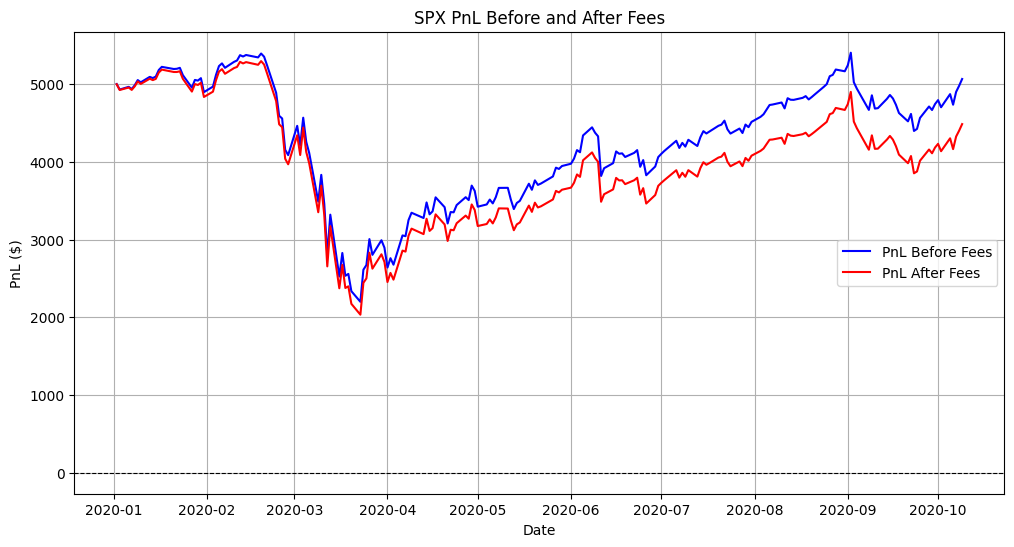

Initial Investment: $5000.00
Final PnL Before Fees: $5064.96
Total Fees: $580.16
Final PnL After Fees: $4484.80


In [5]:


import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Define the ticker and the period of interest
ticker = '^SPX'  # SPX index
start_date = '2020-01-01'
end_date = '2020-10-10'

# Fetch historical data from Yahoo Finance
spx_data = yf.download(ticker, start=start_date, end=end_date)
spx_data = spx_data[['Close']].rename(columns={'Close': 'Settlement Price'})

# Reset index to get the date as a column
spx_data.reset_index(inplace=True)
spx_data['Date'] = pd.to_datetime(spx_data['Date'])
spx_data.set_index('Date', inplace=True)

# Calculate daily returns
spx_data['Daily Return'] = spx_data['Settlement Price'].pct_change().fillna(0)

# Leverage factor
leverage = 2

# Calculate leveraged daily returns
spx_data['Leveraged Return'] = spx_data['Daily Return'] * leverage

# Initial investment and fees
initial_investment = 5000  # Assuming starting with $5,000
daily_fee = 1.48
weekend_fee = 4.44

# Calculate daily PnL before fees
spx_data['PnL Before Fees'] = initial_investment * (1 + spx_data['Leveraged Return']).cumprod()

# Apply fees
spx_data['Daily Fee'] = daily_fee
spx_data['Weekend Fee'] = spx_data['Daily Fee'].where(spx_data.index.dayofweek < 5, weekend_fee)  # Apply weekend fees on Saturdays and Sundays

# Calculate total fees
spx_data['Total Fees'] = spx_data['Daily Fee'].cumsum() + spx_data['Weekend Fee'].cumsum()

# Calculate PnL after fees
spx_data['PnL After Fees'] = spx_data['PnL Before Fees'] - spx_data['Total Fees']

# Final PnL calculations
final_pnl_before_fees = spx_data['PnL Before Fees'].iloc[-1]
total_fees = spx_data['Total Fees'].iloc[-1]
final_pnl_after_fees = final_pnl_before_fees - total_fees  # This ensures the relationship holds

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(spx_data.index, spx_data['PnL Before Fees'], label='PnL Before Fees', color='blue')
plt.plot(spx_data.index, spx_data['PnL After Fees'], label='PnL After Fees', color='red')
plt.title('SPX PnL Before and After Fees')
plt.xlabel('Date')
plt.ylabel('PnL ($)')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Line at zero for reference
plt.legend()
plt.grid()
plt.show()

# Displaying the results
print(f"Initial Investment: ${initial_investment:.2f}")
print(f"Final PnL Before Fees: ${final_pnl_before_fees:.2f}")
print(f"Total Fees: ${total_fees:.2f}")
print(f"Final PnL After Fees: ${final_pnl_after_fees:.2f}")  # This line explicitly shows the calculation
